##Import required libraries

In [1]:
#for data wrangling in rtable format
import pandas as pd
#for vizualization(butlyt ontop of matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
#used indicativlly fo creating a mask in for the corelleation table 
import numpy as np

##IMPORT THE CSV FILE INTO A PANDAS DATAFRAME FRAME FOR ANALYSIS

In [2]:
#import file from directory
df = pd.read_csv('medical_examination.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


frm the above information, there are no null values 

In [3]:
#convert age from days to years for easier understanding
df['age'] = round(df['age']/365,1)
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0


##ADD OVERWEIGHT COLUMN

In [4]:
#Convert height to meters, divide my 100 and round to 1 decimal point 
df['height']= round(df['height']/100 , 1)

In [9]:
#calculate bmi
df['bmi'] = df['weight']/((df['height'])**2)

#Classify for over weight
#(If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight)
df['overweight']= [1 if x >25 else 0 for x in df['bmi']]


In [13]:
#Normalize data
'''Normalize the data by making 0 always good and 1 always bad. 
If the value of cholesterol or gluc is 1, make the value 0. 
If the value is more than 1, make the value 1'''
df['cholesterol']= [0 if x==1 else 1 for x in df['cholesterol']]

df['gluc']= [0 if x == 1 else 1 for x in df['gluc']]

#Eliminates the bmi column 
df.drop(columns = ['bmi'] )

df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,50.4,2,1.7,62.0,110,80,0,0,0,0,1,0,21.453287,0
1,1,55.4,1,1.6,85.0,140,90,1,0,0,0,1,1,33.203125,1
2,2,51.7,1,1.6,64.0,130,70,1,0,0,0,0,1,25.000000,0
3,3,48.3,2,1.7,82.0,150,100,0,0,0,0,1,1,28.373702,1
4,4,47.9,1,1.6,56.0,100,60,0,0,0,0,0,0,21.875000,0


In [26]:
#Convert the data into long format
df_cat = pd.melt(df,id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
#Convert the data into long format & show the value counts of the categorical features
df_cat = pd.DataFrame(df_cat.groupby(['variable', 'value','cardio'])['value'].count()).rename(columns=
            {'value': 'total'}).reset_index()

In [17]:
df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [27]:
##Visualiizng using seaborn 
sns.catplot(x='variable', y='total', hue='value', 
              col='cardio', data=df_cat, kind='bar')


,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,23055


In [52]:
##Clean the data. Filter out

df_heat = df[(df['ap_lo'] <= df['ap_hi'])
   &(df['height'] >= df['height'].quantile(0.025))
   &(df['height'] <= df['height'].quantile(0.975))
   &(df['weight'] >= df['weight'].quantile(0.025))
   &(df['weight'] <= df['weight'].quantile(0.975))
  ]

In [53]:
##creat correlation table 
df_corr = df_heat.corr()

##create mask to remove upper boundaries 
mask = np.zeros_like(df_corr, dtype = bool)
mask[np.triu_indices_from(mask)]= True


<AxesSubplot:>

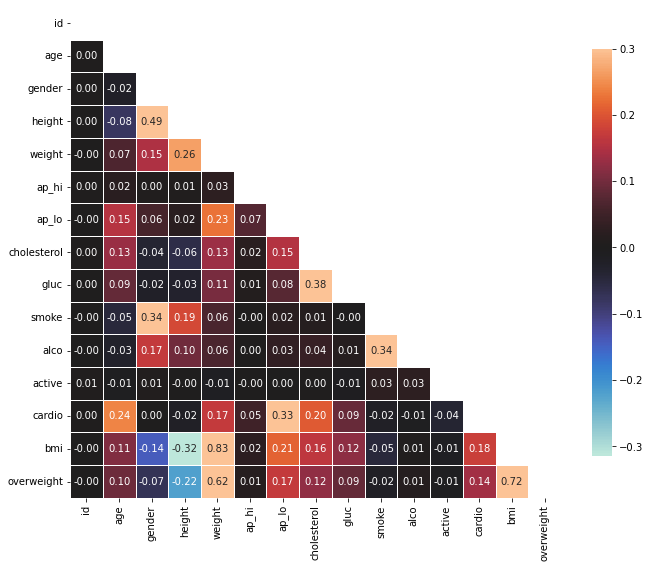

In [57]:
##plot heatmap
f, ax = plt.subplots(figsize=(11, 15))
sns.heatmap(df_corr, annot=True, fmt='.2f', mask=mask, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
#add the column names as labels
ax.set_yticklabels(df_corr.columns, rotation = 0)
ax.set_xticklabels(df_corr.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})